<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Project_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HARD WORK


In [106]:
#install library
!pip install google-search-results
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
#import library needed for the search
import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
from serpapi import GoogleSearch
import plotly.express as px
import squarify
import seaborn as sns
import re 

plt.style.use('fivethirtyeight')

In [108]:
#SerpApi google search
search_term="Data Analyst" #Job to be searching
search_location="United States" #Places where you search https://serpapi.com/google-countries


params = {
  "q": search_term,
  "location": search_location,
  "engine" : "google_jobs",
  "hl": "en",
  "gl": "us",
  "google_domain": "google.com",
  "api_key": "a74096ebb3b875e086bdf8353fb1e90edbd5bdbb2c9e9ea9bf863f98e55ac489"
}

In [109]:
#creating dataframe with the information obtenied of the search
search = GoogleSearch(params)
results = search.get_dict()
jobs_df = results['jobs_results']
jobs_df = pd.DataFrame(jobs_df)
jobs_df = pd.concat([pd.DataFrame(jobs_df),
                     pd.json_normalize(jobs_df['detected_extensions'])],
                    axis=1).drop('detected_extensions',1)
         

https://serpapi.com/search


<ipython-input-109-d668609e91a2>:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [110]:
#Quick looking on the dataframe
jobs_df.head(1)

,title,company_name,location,via,description,job_highlights,related_links,thumbnail,extensions,job_id,posted_at,schedule_type,work_from_home,salary
0,Data Analyst,Salderz Inc,Anywhere,via LinkedIn,"Data Analyst roles - primarily with ETL, SQL, ...","[{'title': 'Qualifications', 'items': ['Data A...",[{'link': 'https://www.google.com/search?gl=us...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[22 minutes ago, Work from home, Full-time]",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,22 minutes ago,Full-time,True,NaN


In [111]:
jobs_df.isnull().sum() #Looking for null values

title             0
company_name      0
location          0
via               0
description       0
job_highlights    2
related_links     0
thumbnail         5
extensions        0
job_id            0
posted_at         0
schedule_type     0
work_from_home    4
salary            9
dtype: int64

In [112]:
jobs_df.shape #Shape of the DataFrame

(10, 14)

In [113]:
jobs_df.info() #Information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           10 non-null     object
 1   company_name    10 non-null     object
 2   location        10 non-null     object
 3   via             10 non-null     object
 4   description     10 non-null     object
 5   job_highlights  8 non-null      object
 6   related_links   10 non-null     object
 7   thumbnail       5 non-null      object
 8   extensions      10 non-null     object
 9   job_id          10 non-null     object
 10  posted_at       10 non-null     object
 11  schedule_type   10 non-null     object
 12  work_from_home  6 non-null      object
 13  salary          1 non-null      object
dtypes: object(14)
memory usage: 1.2+ KB


**# HARD SKILLS **


In [114]:
#Normalize column
jobs = pd.json_normalize(jobs_df.job_highlights )

In [115]:
jobs_df2 = pd.DataFrame(jobs) #Creating DataFrame with data obtenied from the normalization
Ujobs = jobs_df2[0].apply(pd.Series) #applying Series to read data

#Ujobs.loc[Ujobs["items"].str.contains("SQL")]

In [116]:
Ujobs = Ujobs.drop(columns = "title") #Eliminated column with irrelevant information 
Ujobs = Ujobs.dropna()

In [117]:
Ujobs

,items
0,"[Data Analyst roles - primarily with ETL, SQL,..."
1,[3+ years’ previous analytics experience devel...
2,"[Bachelors' in relevant field, 5+ years of exp..."
3,"[Past experience using Tableau required, Exten..."
4,[Applicants must reside in Kansas or Missouri ...
6,[We believe that to deliver exceptional servic...
7,[BS in computer science or a related field or ...
9,[Bachelor's degree (preferably in computer sci...


In [118]:
# Creating new DataFrame extracting data to search keywords
toolsJob = pd.DataFrame()
for i in Ujobs['items']:
  toolsJob = toolsJob.append(i,ignore_index=True)

In [119]:
pd.pivot_table(toolsJob,index = toolsJob)

""
0
"10% -Communication: Work with different teams (IT managers, Executives, Business Partners) to better understand the business and the challenges"
20% -Support and Testing: Use skills to validate the functionality of software solutions and provide necessary support to end-users to resolve different operational issues
3+ years working as a data analyst
3+ years’ experience with Microsoft Power BI or similar products
3+ years’ experience with T-SQL
...
Values a diverse and inclusive work environment
"We believe that to deliver exceptional service, which drives our business model, we need"
Willingness and eager to learn; is curious


In [120]:
# Extracting hard skill to do job

tools = []
for i in toolsJob[0]:
  if "SQL" in i:
    tools.append("SQL")


for i in toolsJob[0]:
  if "Python" in i:
    tools.append("Python")

for i in toolsJob[0]:  
  if " R " in i:
    tools.append("R")

for i in toolsJob[0]:   
  if "Excel" in i:
    tools.append("Excel")

for i in toolsJob[0]:
  if "Tableau" in i:
    tools.append("Tableau")

for i in toolsJob[0]:   
  if "Power BI" in i:
    tools.append("Power BI")

for i in toolsJob[0]:   
  if "TensorFlow" in i:
    tools.append("TensorFlow")    

In [121]:
tools

['SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'Python',
 'Python',
 'Python',
 'Python',
 'Python',
 'Excel',
 'Excel',
 'Excel',
 'Tableau',
 'Tableau',
 'Tableau',
 'Power BI',
 'Power BI']

**# AVERAGE TIME**

In [122]:
#Extracting time and place to work

time = []
for i in jobs_df['extensions']:
  if "Work from home" in i:
    time.append("Work from home")
  
for i in jobs_df['extensions']:
  if "Full-time" in i:
    time.append("Full-time")

for i in jobs_df['extensions']:
  if "Part-time" in i:
    time.append("Part-time")   



# **SUMMARY**

In [129]:
#Sunburst chart of the companies that offer the job

name = jobs_df.groupby(['company_name'])['company_name'].count()
px.sunburst(name, path=[name.index], values=name.values)

In [130]:
toolss = pd.DataFrame(tools)

(0.0, 8.0)

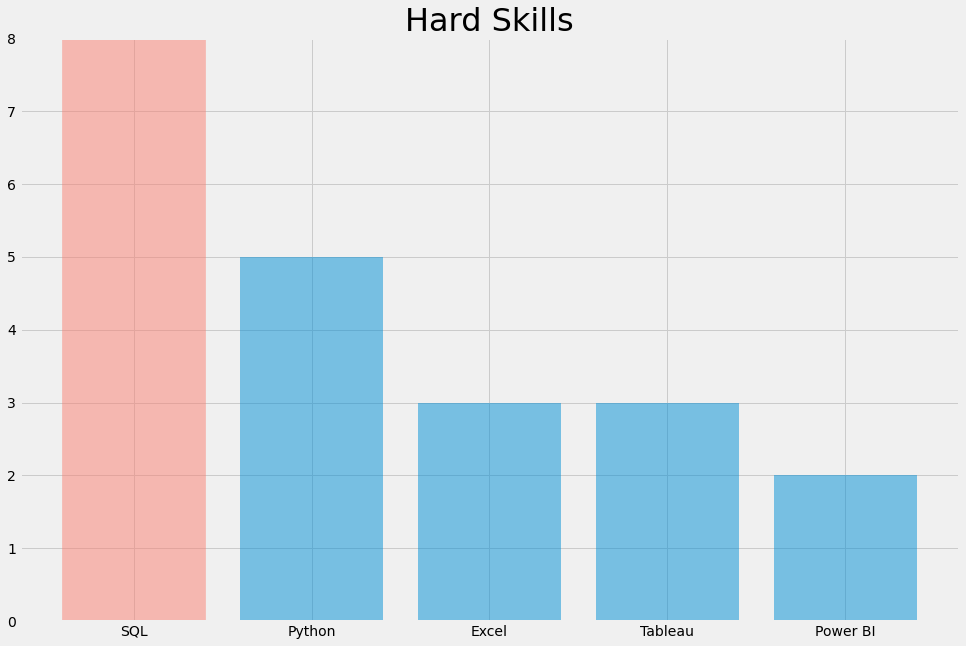

In [131]:
# Bar chart of the hard skills needed to execute the job
t = toolss.groupby(0)[0].count().sort_values(ascending=False)

plt.figure(figsize=(15,10))
fig = plt.bar(x=t.index, height=t.values, alpha=0.5)
fig[0].set_color('salmon')
plt.title("Hard Skills", fontsize=32)
plt.ylim(0,8)


(0.0, 11.0)

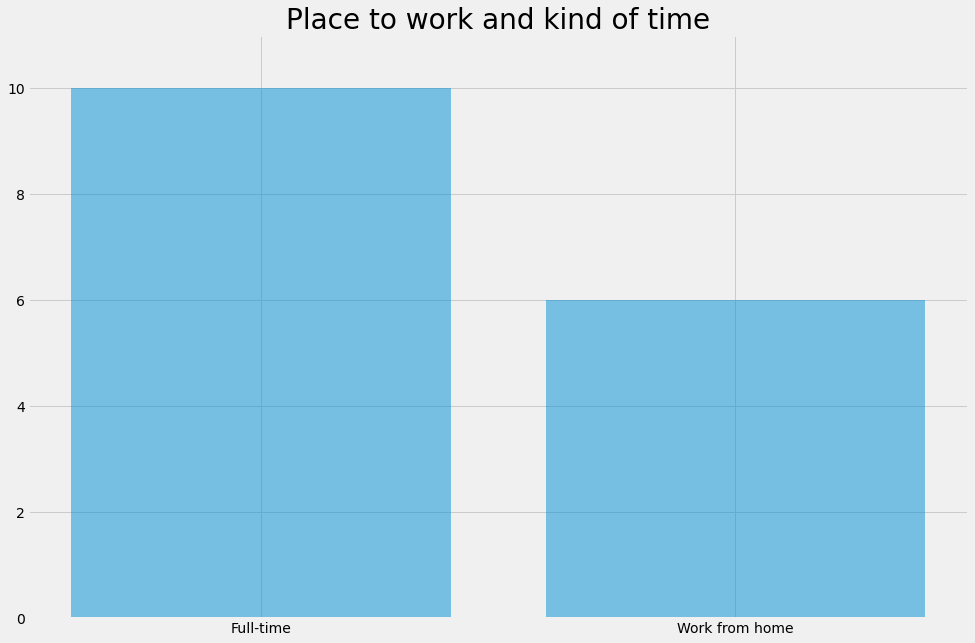

In [132]:
#Bar chart of the places and time to do the job

ti = pd.DataFrame(time)
tim =ti.groupby(0)[0].count().sort_values(ascending=False)

plt.figure(figsize=(15,10))
plt.bar(x=tim.index, height= tim.values, alpha=0.5)
plt.title("Place to work and kind of time", fontsize=28)
plt.ylim(0,11)


Text(0.5, 0, 'Posted at')

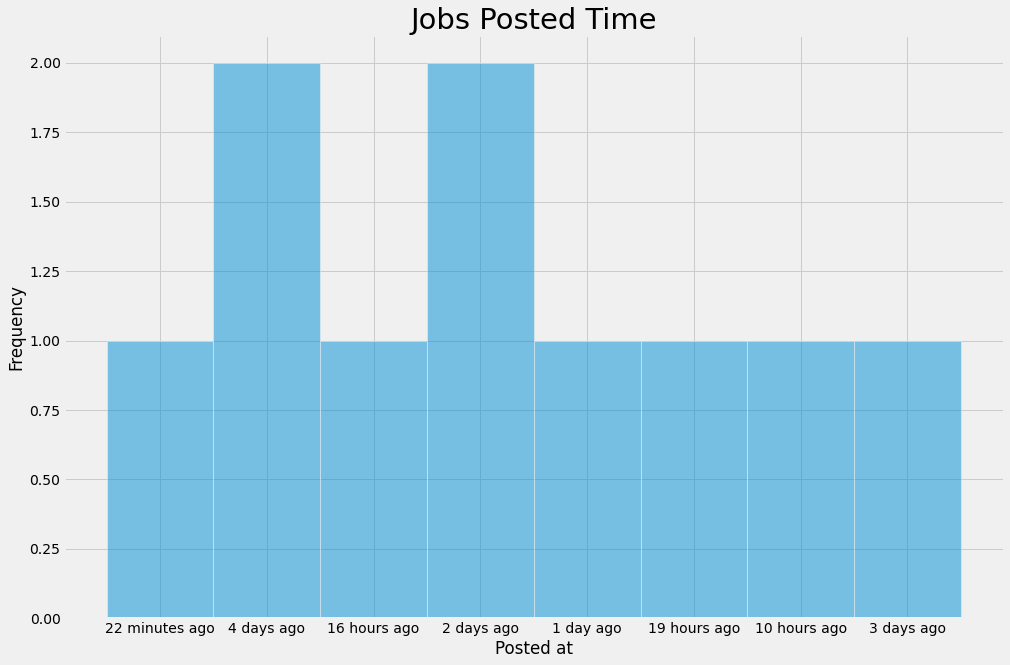

In [133]:
plt.figure(figsize=(15,10))
sns.histplot(jobs_df['posted_at'], bins=15, alpha=0.5)
plt.title("Jobs Posted Time", fontsize=29)
plt.ylabel("Frequency")
plt.xlabel("Posted at")

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

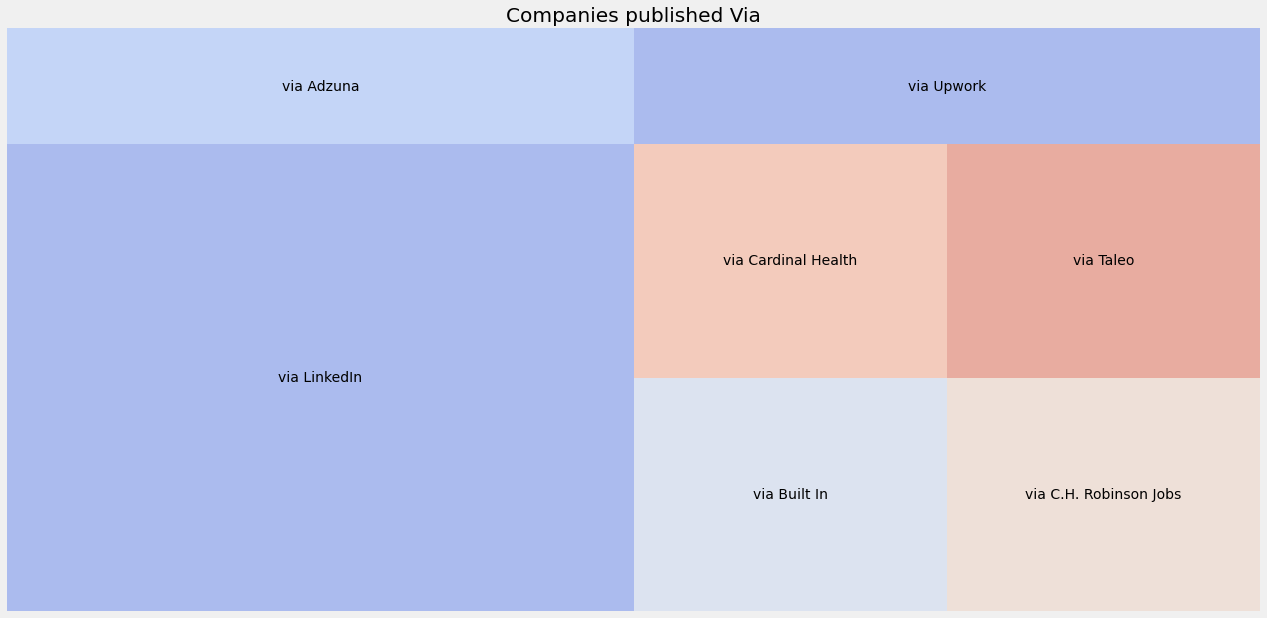

In [134]:
#Tree-map chart than where the companies published the vacancies

via = jobs_df.groupby(['via'])['via'].count().sort_values(ascending=False)
name

plt.figure(figsize=(20,10))
sizes=via.values
label=via.index
squarify.plot(sizes=sizes,label=label,color = sns.color_palette("coolwarm"), alpha=0.5)
plt.axis("off")
plt.title("Companies published Via")
plt.xticks(rotation=45, fontsize=20)